In [114]:
import pandas as pd
from tabulate import tabulate
import numpy as np
from math import sqrt, log10
import matplotlib.pyplot as plt
import pylab as plb

In [115]:
x = [0.05, 0.4, 0.8, 1.2, 1.6, 2, 2.4]
y = [550, 750, 1000, 1400, 2000, 2700, 3750]

In [116]:
logx = list(map(lambda x: log10(x), x))
logy = list(map(lambda y: log10(y), y))
logxlogy = list(map(lambda x, y: log10(x)*log10(y), x,y))
logx2 = list(map(lambda x: log10(x)**2, x))
p = sum(logy)/len(logy)
logy_p2 = list(map(lambda y: (log10(y)-p)**2, y))


In [117]:
vector = np.array([[sum(logy)],[sum(logxlogy)]])
print(vector)

[[22.06797702]
 [-1.68537519]]


In [118]:
matrix = np.array([[len(x), sum(logx)],[sum(logx), sum(logx2)]])
print(matrix)

[[ 7.         -0.83133755]
 [-0.83133755  2.14354113]]


In [119]:
matrix_inv = np.linalg.inv(matrix)
print(matrix_inv)

[[0.14975487 0.05807999]
 [0.05807999 0.48904313]]


In [120]:
log_a = np.matmul(matrix_inv,vector)[0]
log_b = np.matmul(matrix_inv,vector)[1]
print(log_a,log_b)

[3.20690041] [0.45748669]


In [121]:
last_column = list(map(lambda logx,logy: (logy-(log_a+log_b*logx))**2, logx,logy))
print(last_column)

[array([0.01655499]), array([0.02243611]), array([0.0264275]), array([0.00940837]), array([5.58619011e-07]), array([0.00752489]), array([0.0373221])]


In [122]:
alpha = 10**log_a
betha = log_b
print(alpha, betha)

[1610.27633985] [0.45748669]


In [123]:
print(f'y = {alpha[0]}x^{betha[0]}')

y = 1610.2763398496295x^0.4574866921974461


In [124]:
r2 = (sum(logy_p2)-sum(last_column))/sum(logy_p2)
print(r2)

[0.78147269]


In [125]:
data = pd.DataFrame(list(zip(x,y,logx,logy,logxlogy,logx2,logy_p2,last_column)), columns=['x','y','log(x)','log(y)','log(x)*log(y)','log(x)^2','(log(y)-p)^2','(log(y)-(log(a+b)*log(x)))^2'])
data.loc['Total']= data.sum(axis=0)
print(tabulate(data, headers='keys', tablefmt='psql'))

+-------+------+-------+------------+----------+-----------------+------------+----------------+--------------------------------+
|       |    x |     y |     log(x) |   log(y) |   log(x)*log(y) |   log(x)^2 |   (log(y)-p)^2 |   (log(y)-(log(a+b)*log(x)))^2 |
|-------+------+-------+------------+----------+-----------------+------------+----------------+--------------------------------|
| 0     | 0.05 |   550 | -1.30103   |  2.74036 |       -3.56529  | 1.69268    |     0.169913   |                    0.016555    |
| 1     | 0.4  |   750 | -0.39794   |  2.87506 |       -1.1441   | 0.158356   |     0.0770101  |                    0.0224361   |
| 2     | 0.8  |  1000 | -0.09691   |  3       |       -0.29073  | 0.00939155 |     0.023277   |                    0.0264275   |
| 3     | 1.2  |  1400 |  0.0791812 |  3.14613 |        0.249114 | 0.00626967 |     4.1475e-05 |                    0.00940837  |
| 4     | 1.6  |  2000 |  0.20412   |  3.30103 |        0.673806 | 0.041665   |     0.0220

Text(0.5, 1.0, 'Potential regression')

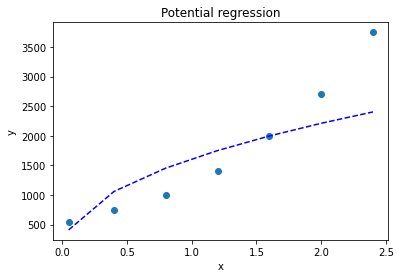

In [126]:
line = alpha*x**betha
plb.scatter(x,y)
plb.plot(x,line,'b--')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Potential regression")